# Titanic

In [3]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
def bar_plot(attribute):
    survived=train[train['Survived']==1][attribute].value_counts()
    death=train[train['Survived']==0][attribute].value_counts()
    df=pd.DataFrame([survived,death])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,6))

In [10]:
data=[train,test]
for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Lady          1
Countess      1
Jonkheer      1
Capt          1
Sir           1
Don           1
Ms            1
Name: Title, dtype: int64

In [12]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [13]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [14]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
gender_mapping={'male':1,'female':2}
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(gender_mapping)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,2,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,2,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,2,22.0,1,1,3101298,12.2875,NaN,S,2


In [20]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

In [21]:
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [23]:
#binning the age group 
for dataset in data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

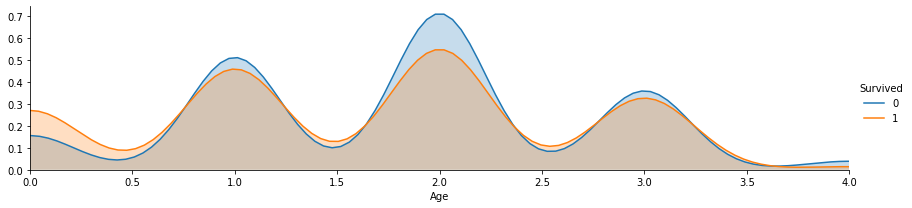

In [24]:
f = sns.FacetGrid(train, hue="Survived",aspect=4)
f.map(sns.kdeplot,'Age',shade= True)
f.set(xlim=(0, train['Age'].max()))
f.add_legend()
 
plt.show()

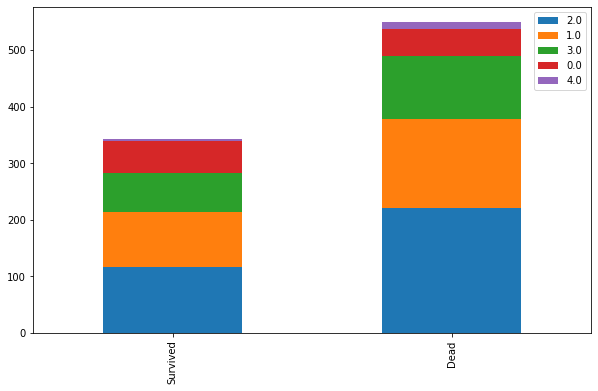

In [25]:
#Visualizing Age with passenger survived and dead and dead and analyzing which Age group survived most
bar_plot('Age')

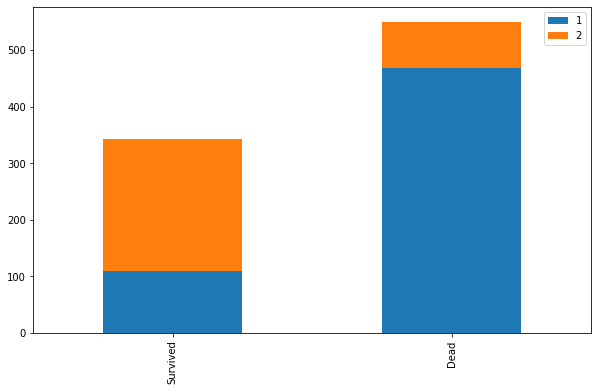

In [26]:
#Visualizing Gender with passenger survived and dead and dead and analyzing which gender survived most
bar_plot('Sex')

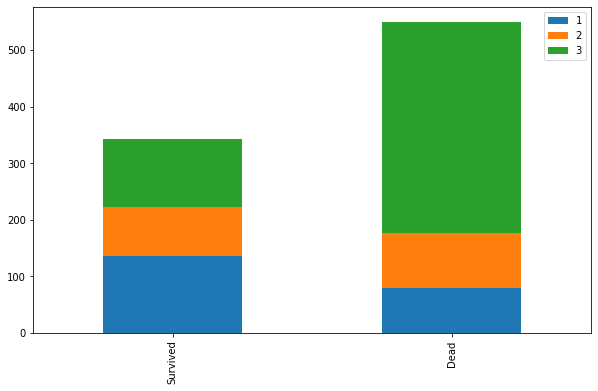

In [27]:
#Visualizing passenger class with passenger survived and dead and analyzing which class survived most
bar_plot('Pclass')

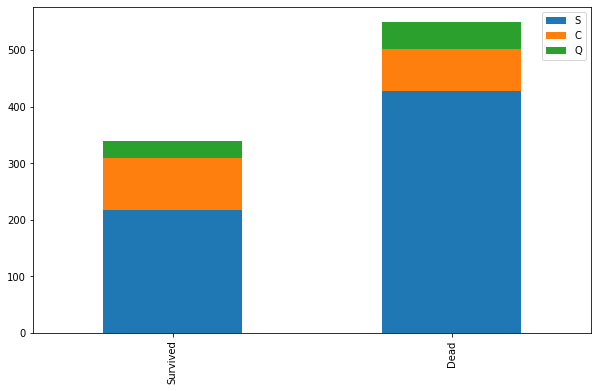

In [28]:
#Visualizing Embarked with passenger survived and dead and analyzing passenger from which Embarked survived most

bar_plot('Embarked')

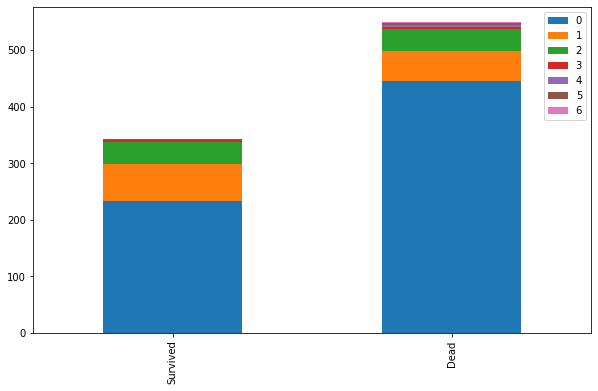

In [29]:
#Visualizing Parch with passenger survived and dead 

bar_plot('Parch')

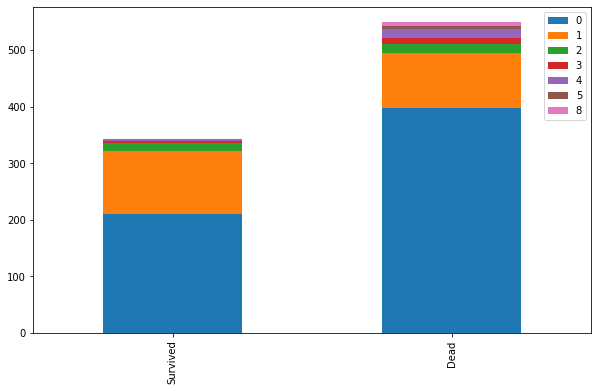

In [30]:
#Visualizing SibSp with passenger survived and dead

bar_plot('SibSp')

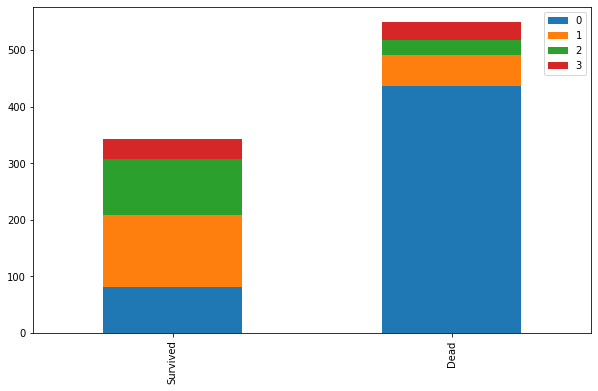

In [31]:
#Visualizing passenger Title with passenger survived and dead and analyzing which Title survived most

bar_plot('Title')

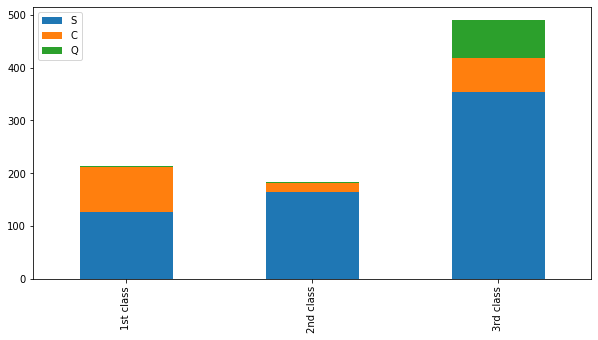

In [32]:
#Checking the most common Embarked
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [33]:
#Filling missing values in Embarked
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,2,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,2,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,2,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,0


In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [36]:
#binnig embarked with 0, 1 and 2
embarked_mapping={'S':0,'C':1,'Q':2}

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [37]:
# filling missing fare value with the median of the fare
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [38]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,1,2.0,0,0,211536,13.00,NaN,0,3
887,888,1,1,2,1.0,0,0,112053,30.00,B42,0,1
888,889,0,3,2,1.0,1,2,W./C. 6607,23.45,NaN,0,1
889,890,1,1,1,1.0,0,0,111369,30.00,C148,1,0
890,891,0,3,1,2.0,0,0,370376,7.75,NaN,2,0


In [39]:
#binning the fare 
for dataset in data:
    dataset.loc[dataset['Fare']<=17,'Fare']=0,
    dataset.loc[(dataset['Fare']>17)&(dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>100,'Fare']=3

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,2,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,2,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,2,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,0,0


In [41]:
# Handling Missing Value in Cabin
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
              ..
A16            1
A32            1
B101           1
B39            1
D46            1
Name: Cabin, Length: 147, dtype: int64

In [42]:
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

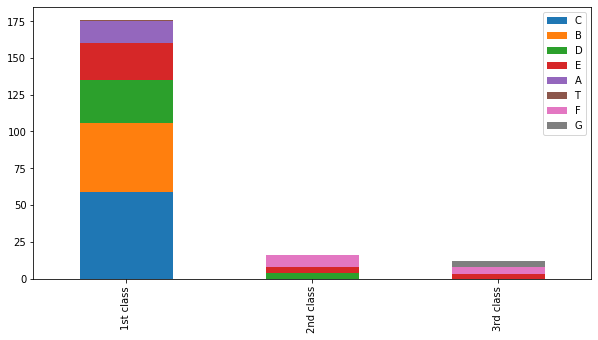

In [43]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [44]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [45]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [46]:
#getting Family size from SibSp and Parch
train['FamilySize']=train['SibSp']+train['Parch'] + 1
test['FamilySize']=test['SibSp']+test['Parch']+1

(0, 11.0)

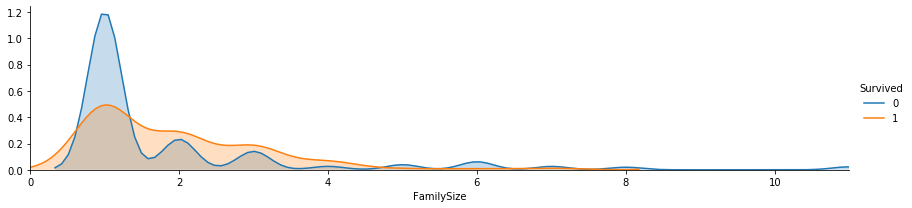

In [47]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [49]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,2,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,2,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,2,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,0,0,0.0


(0, 4.0)

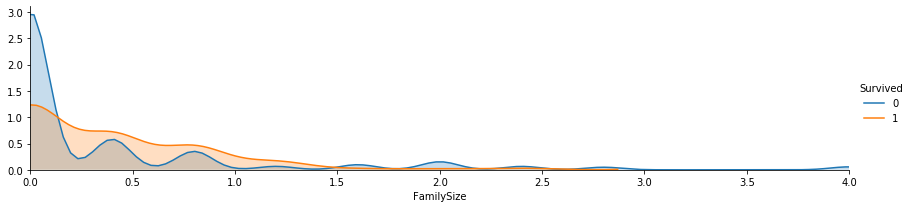

In [51]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [52]:
drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(drop, axis=1)
test = test.drop(drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [53]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,1,1.0,0.0,2.0,0,0,0.4
1,1,1,2,3.0,2.0,0.8,1,2,0.4
2,1,3,2,1.0,0.0,2.0,0,1,0.0
3,1,1,2,2.0,2.0,0.8,0,2,0.4
4,0,3,1,2.0,0.0,2.0,0,0,0.0


In [54]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,1,2.0,0.0,2.0,2,0,0.0
1,893,3,2,3.0,0.0,2.0,0,2,0.4
2,894,2,1,3.0,0.0,2.0,2,0,0.0
3,895,3,1,2.0,0.0,2.0,0,0,0.0
4,896,3,2,1.0,0.0,2.0,0,2,0.8


In [55]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [56]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,1,1.0,0.0,2.0,0,0,0.4
1,1,2,3.0,2.0,0.8,1,2,0.4
2,3,2,1.0,0.0,2.0,0,1,0.0
3,1,2,2.0,2.0,0.8,0,2,0.4
4,3,1,2.0,0.0,2.0,0,0,0.0


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [59]:
# Making DecisionTree model for predicition and calculating Validation score 
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.76404494 0.7752809  0.87640449 0.76404494
 0.83146067 0.82022472 0.74157303 0.79775281]


In [61]:
# decision tree Score
round(np.mean(score)*100, 2)

79.58

In [62]:
# Predicting using Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [63]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [65]:
submission = pd.read_csv('submission.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
